# MACHINE LEARNING MODEL FOR TRAFFIC SIGN DETECTION

##        CONVOLUTIONAL NEURAL NETWORKS
---

### Project Description
---

Traffic signs have been designed to be easily recognizable by the human brain, however for computer systems this classification continues to present its limitations in the recognition of their patterns.

This project consists of creating a predictive Machine Learning model for the automated recognition of traffic signs.

For our objective we are going to compare a traditional Super Vector Machine (SVM) classification model and a model based on convolutional neural networks (CNN), we will be changing its hyperparameters to solve its complexity and make the comparison of its results and the margin of error. that each one of them offers us.

For this study, we will use the data set compiled in real time during more than 10 hours of work by the Group Vision team of the German Traffic Sign Recognition Benchmark (GTSRB).

Finally we will stay with the best prediction result offered to us and we will create a traffic sign detector in images based on Deep Learning.

#### Dataset : 

+   Single-image, multi-class classification problem
+   More than 40 classes
+   More than 50,000 images in total
+   Large, lifelike database

#### Structure

+   The training set archive is structures as follows:
+   One directory per class
+   Each directory contains one CSV file with annotations ("GT-<ClassID>.csv") and the training images
+   Training images are grouped by tracks
+   Each track contains 30 images of one single physical traffic sign

#### Image format

+   The images contain one traffic sign each
+   Images contain a border of 10 % around the actual traffic sign (at least 5 pixels) to allow for edge-based approaches
+   Images are stored in PPM format (Portable Pixmap, P6)
+   Image sizes vary between 15x15 to 250x250 pixels
+   Images are not necessarily squared
+   The actual traffic sign is not necessarily centered within the image.This is true for images that were close to the image border in the full camera image
+   The bounding box of the traffic sign is part of the annotatinos (see below)


#### Keywords:
+   Artificial vision,
+   Deep Learning,
+   Object Detection,
+   Supervised Learning,
+   Neural Networks.

### Exploratory Analysis

In [2]:
import pandas as pd
import numpy as np 

#visualization
from utils import visualization_tb as vt
from matplotlib.image import imread
import matplotlib.pyplot as plt

#redimension
import cv2 as cv

#path
import os
from os import listdir
from os.path import isfile, join

In [3]:
training_set = pd.read_csv(os.path.dirname(os.getcwd()) + os.sep + 'data' + os.sep + "Train.csv")
training_set.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [4]:
test_set = pd.read_csv(os.path.dirname(os.getcwd()) + os.sep + 'data' + os.sep + "Test.csv")
test_set.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [5]:
print("Dataset Training:",training_set.shape)
print("Dataset Test:",test_set.shape)

Dataset Training: (39209, 8)
Dataset Test: (12630, 8)


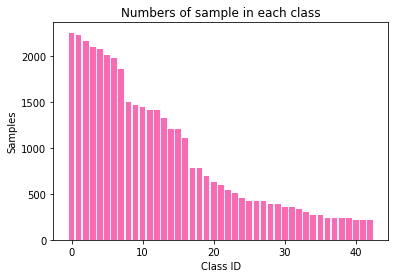

In [6]:
vt.frequency_class(training_set)

In [10]:
data_path = os.path.dirname(os.getcwd()) + os.sep + 'data' + os.sep + "Train" 
data_path

'c:\\Users\\Karina\\Desktop\\data_science_apr_2021\\machine_learning_project\\project\\data\\Train'

In [15]:
for clase in listdir(data_path): #f es la clase
    ruta_clase = data_path + os.sep + clase +os.sep 
    #print(ruta_clase)
    for imagen_name in listdir(ruta_clase):
        imagen_full_name  = ruta_clase+imagen_name

        image_cv = cv.imread(imagen_full_name)
        image_cv = cv.resize(image_cv,())
        #print(imagen_full_name) #todas las rutas completas a todas las carpetas de las clases

In [96]:
df_dict = []
for image_name in only_image_names:
    if ".png" in image_name:
        image_fullpath = data_path + image_name
        image_cv = cv.imread(image_fullpath, 0) # con 0 leemos en blanco y negro
        # Ya que cada una de las imágenes pueden tener resoluciones diferentes --> 
        # redimensiono las imágenes para que todas tengan la resolución de la mínima 
        # resolución original. 
        image_cv = cv.resize(image_cv, (211, 211))  
        #print("##########")
        #print(image_fullpath)
        #print(image_cv.shape)
        if "msk" in image_name:
            df_dict.append({"Image":image_cv, "Label":1, "Fullpath":image_fullpath })
        elif "preview" in image_name:
            df_dict.append({"Image":image_cv, "Label":2, "Fullpath":image_fullpath})
        else:
            df_dict.append({"Image":image_cv, "Label":0, "Fullpath":image_fullpath})
        

df = pd.DataFrame(df_dict)
df.head()

FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: 'c:\\Users\\Karina\\Desktop\\data_science_apr_2021\\machine_learning_project\\project\\data\\clases'